# Movie Rating Prediction

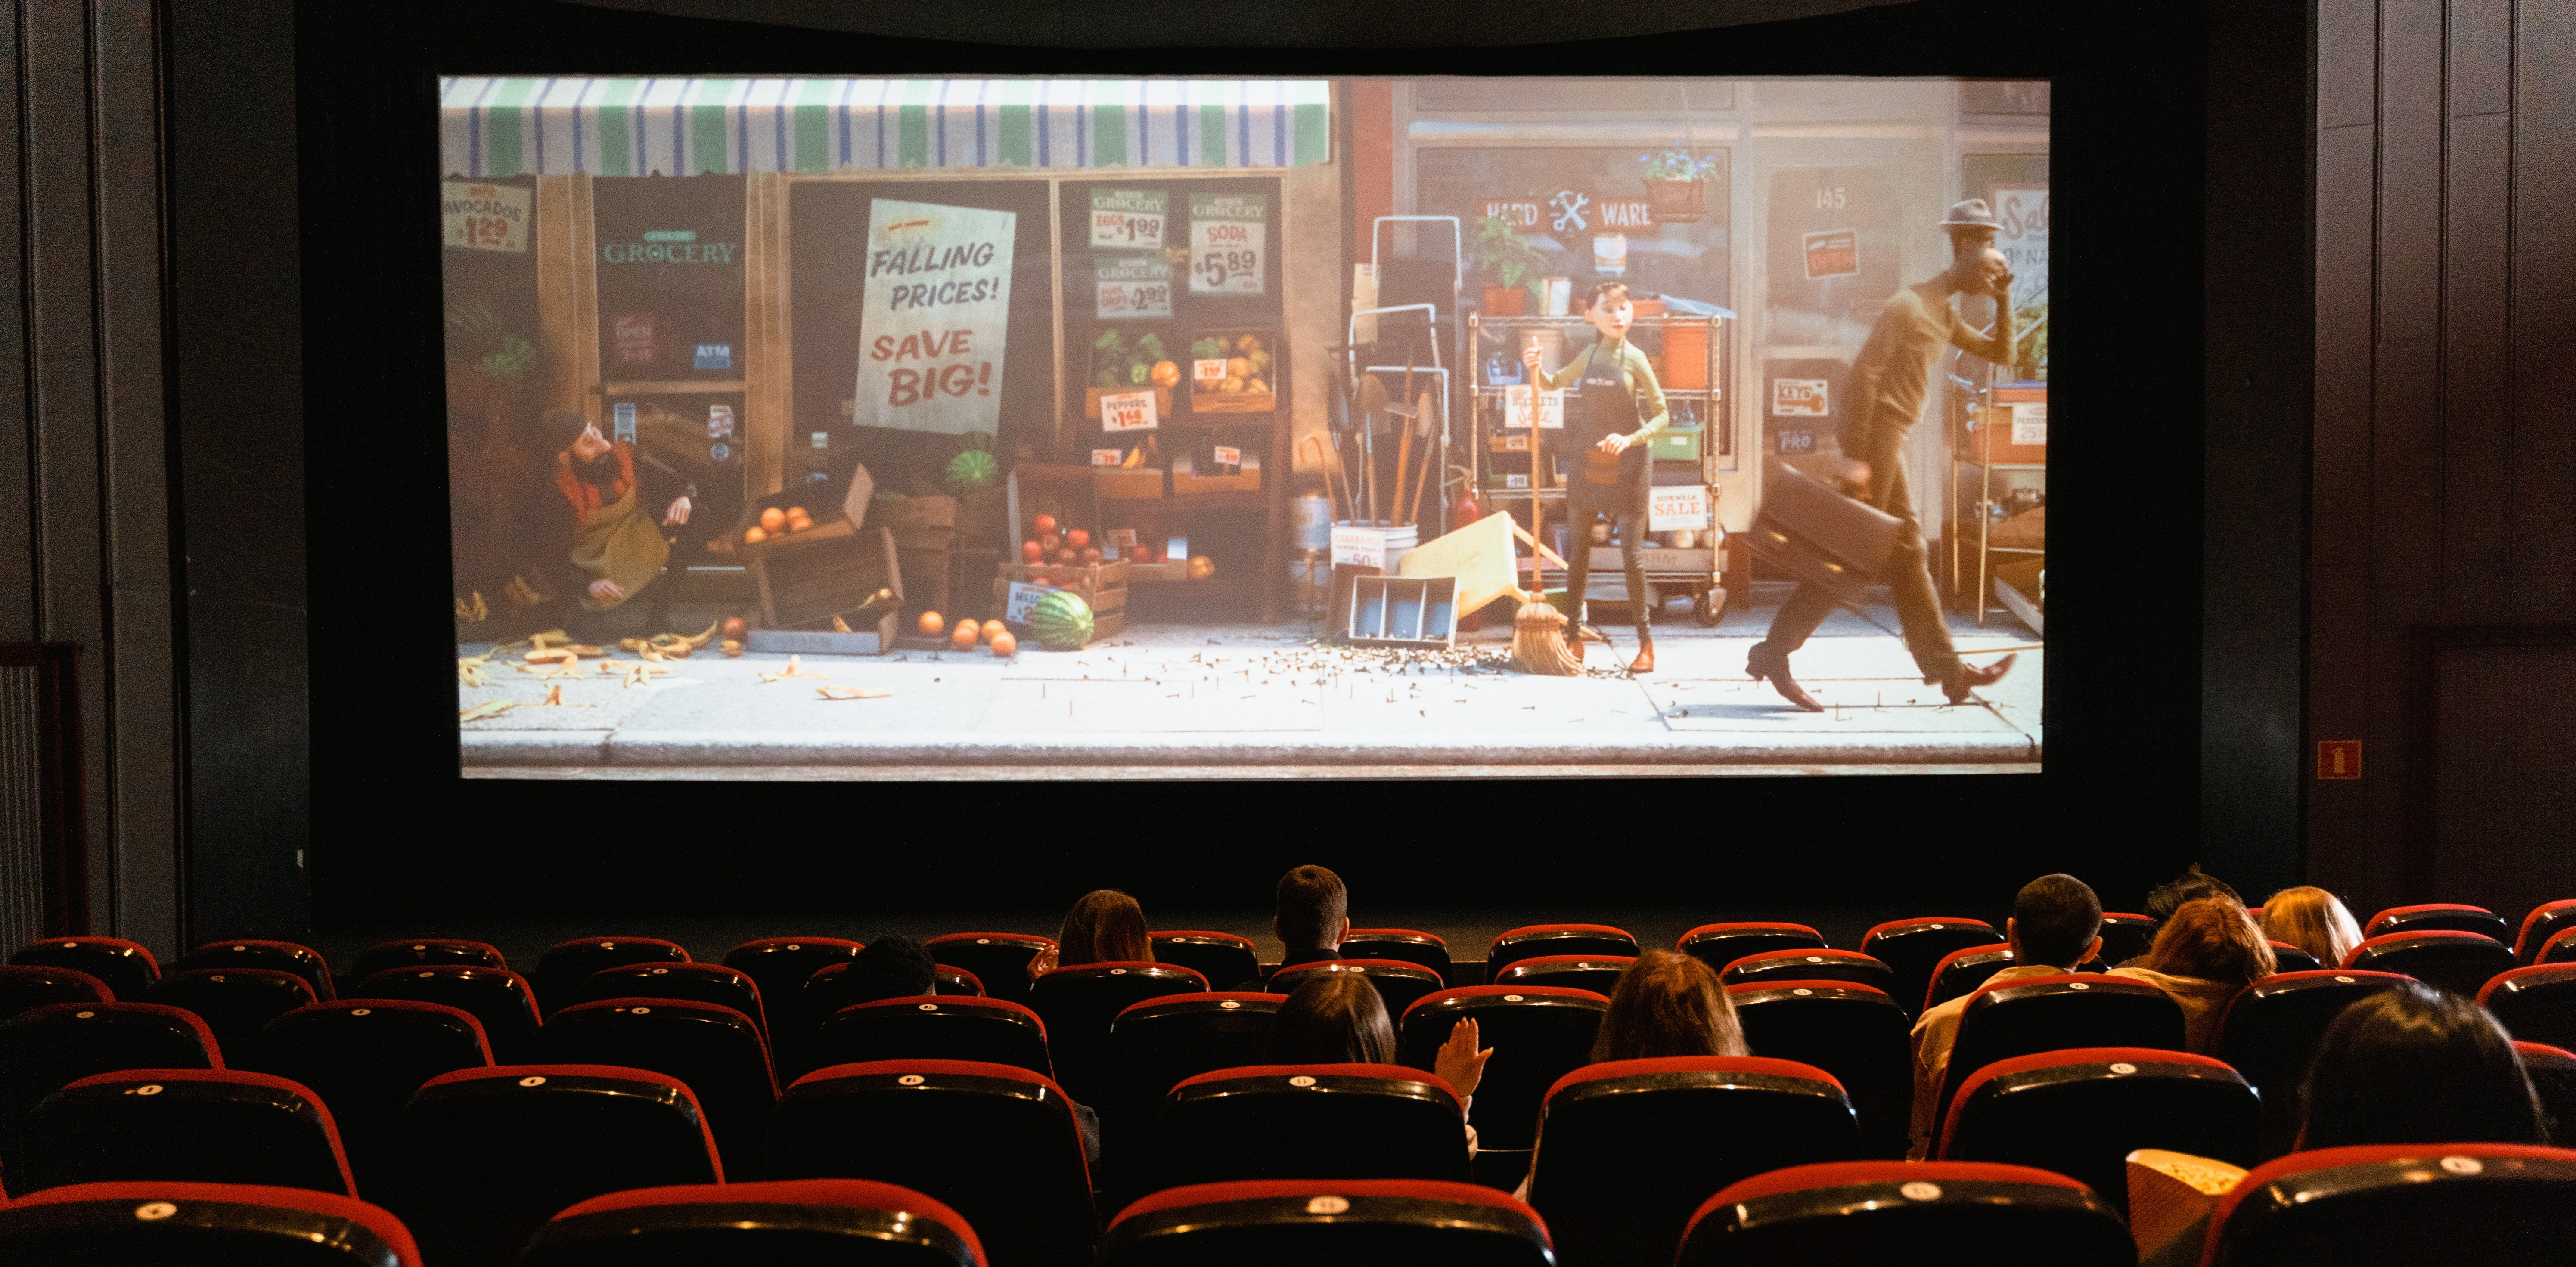

**About this Project:**
* All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided some demographic information are included in this dataset.

In [624]:
# import libraries for data analysis
import numpy as np
import pandas as pd

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

* **Acquire the datasets { movies, ratings, users }**

In [3]:
data1 = pd.read_csv('movies.csv')
data1.head()

S.No                           Movie Name                         Genre
0     1                    Toy Story (1995)    Animation|Children's|Comedy
1     2                      Jumanji (1995)   Adventure|Children's|Fantasy
2     3             Grumpier Old Men (1995)                 Comedy|Romance
3     4            Waiting to Exhale (1995)                   Comedy|Drama
4     5  Father of the Bride Part II (1995)                         Comedy

In [4]:
data2 = pd.read_csv('ratings.csv')
data2.head()

ID  MovieID  Ratings  TimeStamp
0   1     1193        5  978300760
1   1      661        3  978302109
2   1      914        3  978301968
3   1     3408        4  978300275
4   1     2355        5  978824291

In [5]:
data3 = pd.read_csv("users.csv")
data3.head()

UserID Gender  Age  Occupation Zip-Code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7     2460
4       5      M   25          20    55455

### Checking for Missing values

In [6]:
data1.isna().sum()

S.No          0
Movie Name    0
Genre         0
dtype: int64

In [7]:
data2.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [8]:
data3.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-Code      0
dtype: int64

* **Luckyly we've got 0 missing values.**
___

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   S.No        3883 non-null   int64 
 1   Movie Name  3883 non-null   object
 2   Genre       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-Code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


* **Here we can observe column names and their data types.For recall, we've count 0 null values before.**
___

## Data Modeling
* **Create a dataset with movies, ratings, and users.**

In [323]:
df = pd.concat([data1, data2, data3], axis=1)
df.head()

S.No                           Movie Name                         Genre  \
0   1.0                    Toy Story (1995)    Animation|Children's|Comedy   
1   2.0                      Jumanji (1995)   Adventure|Children's|Fantasy   
2   3.0             Grumpier Old Men (1995)                 Comedy|Romance   
3   4.0            Waiting to Exhale (1995)                   Comedy|Drama   
4   5.0  Father of the Bride Part II (1995)                         Comedy   

   ID  MovieID  Ratings  TimeStamp  UserID Gender   Age  Occupation Zip-Code  
0   1     1193        5  978300760     1.0      F   1.0        10.0    48067  
1   1      661        3  978302109     2.0      M  56.0        16.0    70072  
2   1      914        3  978301968     3.0      M  25.0        15.0    55117  
3   1     3408        4  978300275     4.0      M  45.0         7.0     2460  
4   1     2355        5  978824291     5.0      M  25.0        20.0    55455

* **Remove un-useful columns in df dataset.**

In [324]:
df.drop('S.No', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
df.drop('TimeStamp', axis=1, inplace=True)
df.drop('Zip-Code', axis=1, inplace=True)
df.drop('UserID', axis=1, inplace=True)

In [325]:
df.head()

Movie Name                         Genre  MovieID  \
0                    Toy Story (1995)    Animation|Children's|Comedy     1193   
1                      Jumanji (1995)   Adventure|Children's|Fantasy      661   
2             Grumpier Old Men (1995)                 Comedy|Romance      914   
3            Waiting to Exhale (1995)                   Comedy|Drama     3408   
4  Father of the Bride Part II (1995)                         Comedy     2355   

   Ratings Gender   Age  Occupation  
0        5      F   1.0        10.0  
1        3      M  56.0        16.0  
2        3      M  25.0        15.0  
3        4      M  45.0         7.0  
4        5      M  25.0        20.0

* **Changing datatype of every column in the above dataset to avoid the errors during visualization.**

In [82]:
df['Genre'] = df['Genre'].astype(str)

In [83]:
df['Movie Name'] = df['Movie Name'].astype(str)

In [84]:
df['Gender'] = df['Gender'].astype(str)

In [85]:
df['MovieID'] = df['MovieID'].astype(int)

In [86]:
df['Ratings'] = df['Ratings'].astype(int)

In [87]:
df['Age'] = df['Age'].astype(int)

In [88]:
df['Occupation'] = df['Occupation'].astype(int)

## Data Analysis

**1.** Visualize the distribution of top 25 movie genre and count the occurences.

In [96]:
Genre_Counts = df['Genre'].value_counts()

In [411]:
top_25 = Genre_Counts.head(25)

<Axes: title={'center': 'Top 25 Movie Genre'}, xlabel='Movies', ylabel='Movie Count'>

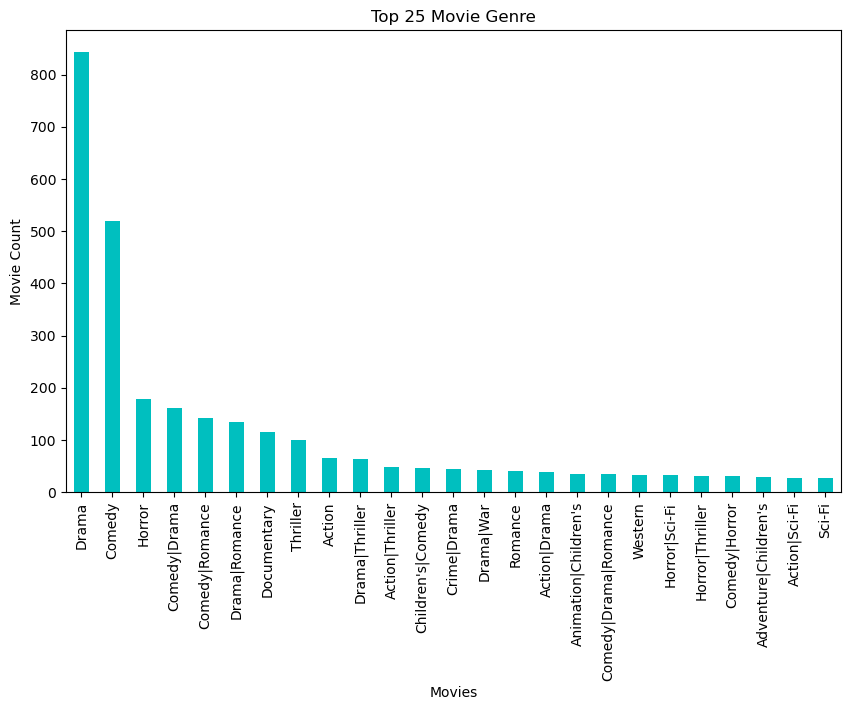

In [412]:
plt.figure(figsize=(10,6))
top_25.plot(kind='bar', color='c', title='Top 25 Movie Genre', ylabel='Movie Count', xlabel='Movies')

* Drama moives are the highest and which are 800+ among other genres.
* Comedy movies are the second whihch are 500+ among other genres.
* Horror movies are 170+

___
**2.** Visualize the distribution of movie ratings and count the how many of ratings occured.

In [223]:
Movie_rating = df['Ratings'].value_counts(ascending=True)

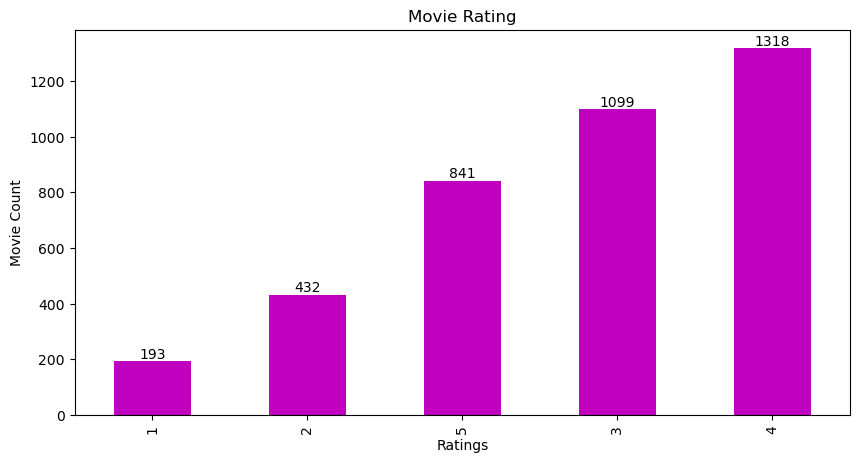

In [359]:
plt.figure(figsize=(10,5))
rating= Moive_rating.plot(kind='bar', color='m', title='Movie Rating', ylabel='Movie Count', xlabel='Ratings')

for index, value in enumerate(Movie_rating):
    rating.annotate(str(value), xy=(index, value), ha='center', va='bottom')

* Here we can see only 800+ movies i.e., 841 got 5 ⭐ rating.
* There are huge 4 ⭐ rating occured for nearly 1200+ movies i.e., 1318.
* For 1000+ movies i.e., 1099 got 3 ⭐ rating.
* 300+ movies i.e., 432 got 2 ⭐ rating and below 180 movies i.e., 193 got 1 ⭐ rating.

___
**3.** Visualize the Age distribution and show which age group people watch movies most.

In [173]:
Age_Count = df['Age'].value_counts(ascending=True)

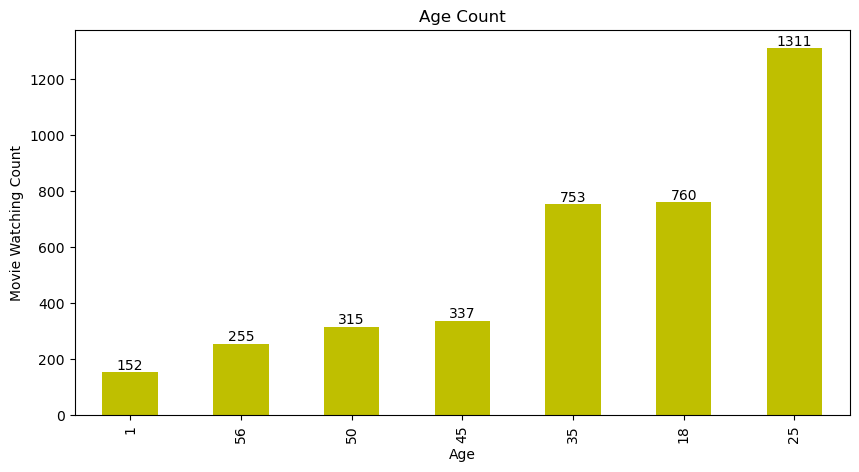

In [239]:
plt.figure(figsize=(10,5))
bar_plot = Age_Count.plot(kind='bar', color='y', title='Age Count', ylabel='Movie Watching Count', xlabel='Age')

for index, value in enumerate(Age_Count):
    bar_plot.annotate(str(value), xy=(index, value), ha='center', va='bottom')

* 25 years old Adult people watched more than 1200+ movies i.e., 1311 movies.
* 18 years old teenage people watched 760 movies.
* 35 years old Adult people watched 753 movies.
* People age 1 year old they came along with their parents, so we can't take them into consideration.

___
**4.** Visualize gender ratio to count which one mostly watching movies.

In [330]:
gender_count = df['Gender'].value_counts()

In [331]:
gender_count

M    4331
F    1709
Name: Gender, dtype: int64

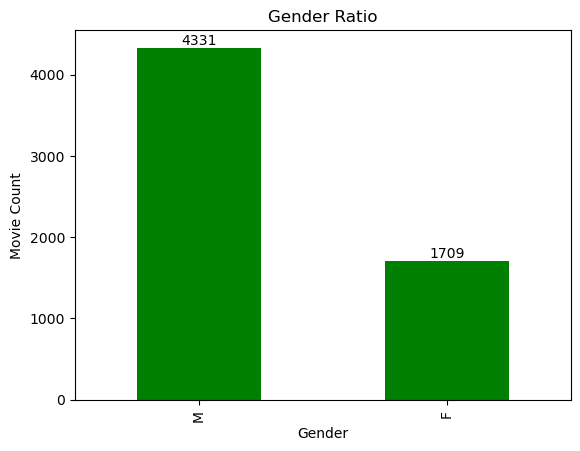

In [400]:
bar_graph = gender_count.plot(kind='bar', title='Gender Ratio', xlabel='Gender', ylabel='Movie Count', color='g')
for index, value in enumerate(gender_count):
    bar_graph.annotate(str(value), xy=(index, value), ha='center', va='bottom')

* There are Males - 4331, Females - 1709.
* Males are watching movies 3 times more than Females.

___
**5.** Visualize and calculate the average or total number of ratings for each genre and visualize the most popular genres.

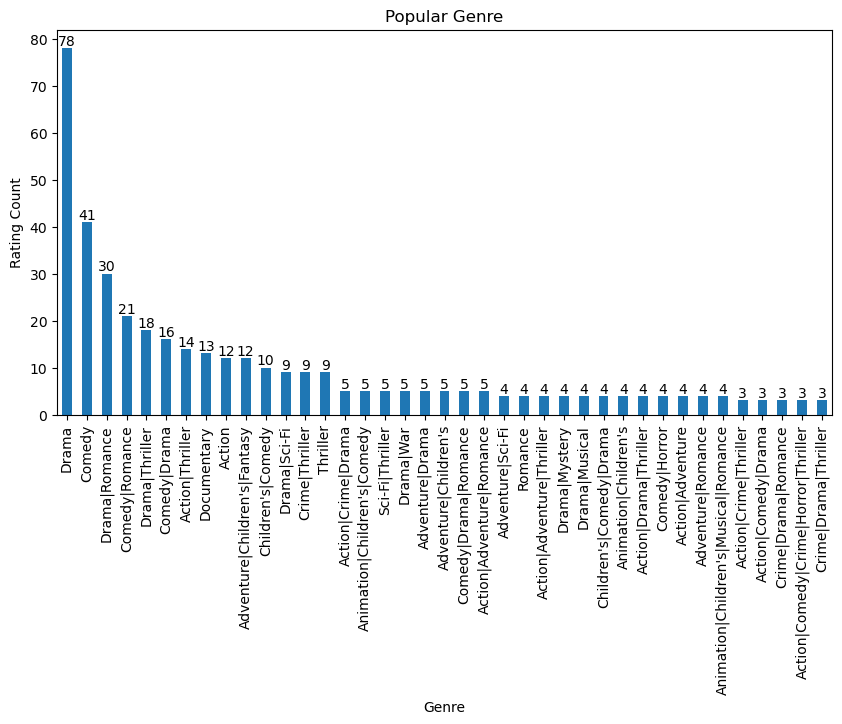

In [421]:
top_25 = df.head(100)

genre_sum_ratings = top_25.groupby('Genre')['Ratings'].sum()

genre_sort_ratings = genre_sum_ratings.sort_values(ascending=False)

plt.figure(figsize=(10,5))

popular_genre = genre_sort_ratings.plot(kind='bar', title='Popular Genre', xlabel='Genre', ylabel='Rating Count')

for index, value in enumerate(genre_sort_ratings):
    popular_genre.annotate(str(value), xy=(index, value), ha='center', va='bottom')

**Note: There are many rows in this dataset like nearly 3000+. so I am taking top 100 to know the most popular genre.**
* Most of the ratings occured to Drama Movies in Top 100.
* Second most ratings occured to Comedy Moives in Top 100.
* Followed by Comedy|Romance, Drama|Romance got so many ratings in Top 100.

___
**6.** Create a stacked bar plot to show the gender distribution for each genre.

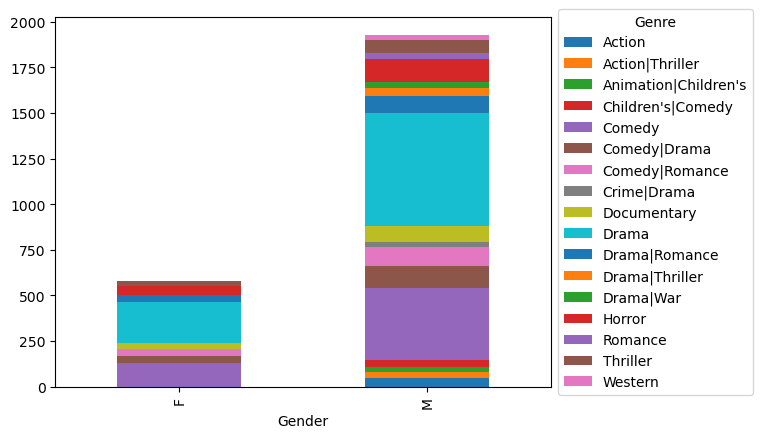

In [456]:
Value_count = df[['Gender', 'Genre']].value_counts()

Top_25 = Value_count.head(25)

Gender_distribution = Top_25.groupby(['Gender', 'Genre']).sum().unstack()

Gender_distribution.plot(kind='bar', stacked=True)

plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1, 0.5))

* Males and Females mostly went for Drama movies.
* Followed by Romantic movies.

___
## Preparing Data Model

In [464]:
df.head()

Movie Name                         Genre  MovieID  \
0                    Toy Story (1995)    Animation|Children's|Comedy     1193   
1                      Jumanji (1995)   Adventure|Children's|Fantasy      661   
2             Grumpier Old Men (1995)                 Comedy|Romance      914   
3            Waiting to Exhale (1995)                   Comedy|Drama     3408   
4  Father of the Bride Part II (1995)                         Comedy     2355   

   Ratings Gender   Age  Occupation  
0        5      F   1.0        10.0  
1        3      M  56.0        16.0  
2        3      M  25.0        15.0  
3        4      M  45.0         7.0  
4        5      M  25.0        20.0

* Took some Top 100 rows to prepare and train the mdoel.

In [552]:
Top_100 = df[100:]
Top_100.dropna(inplace=True)

In [553]:
x = Top_100[['MovieID', 'Age', 'Occupation']].values

In [554]:
x

array([[3.654e+03, 1.800e+01, 3.000e+00],
       [2.852e+03, 3.500e+01, 1.900e+01],
       [1.945e+03, 4.500e+01, 7.000e+00],
       ...,
       [2.174e+03, 1.800e+01, 2.000e+00],
       [9.120e+02, 5.600e+01, 1.400e+01],
       [2.248e+03, 5.000e+01, 1.600e+01]])

In [555]:
y = Top_100[['Ratings']].values

In [556]:
y

array([[3],
       [3],
       [5],
       ...,
       [3],
       [5],
       [4]], dtype=int64)

___
##  Training the Model

In [557]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [558]:
x_train

array([[ 858.,   18.,    4.],
       [2291.,   56.,    8.],
       [1544.,   25.,    4.],
       ...,
       [1375.,   18.,   10.],
       [ 370.,   35.,    9.],
       [2396.,   35.,    7.]])

In [559]:
x_test

array([[3408.,   18.,   17.],
       [2433.,   35.,   17.],
       [ 908.,   18.,    4.],
       ...,
       [ 223.,   35.,   17.],
       [ 610.,   56.,   13.],
       [1955.,   18.,   12.]])

___
## Model Development

In [560]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [567]:
y_lg_pred=lg.predict(x_test)
print("Confidence Score:", round(lg.score(x_train,y_train)*100, 2))

Confidence Score: 32.55


In [578]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [579]:
y_rf_pred = rf.predict(x_test)
print("Confidence Score:", round(rf.score(x_train,y_train)*100, 2))

Confidence Score: 97.77


In [581]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [582]:
y_kn_pred = kn.predict(x_test)
print("Confidence Score:", round(kn.score(x_train,y_train)*100,2))

Confidence Score: 52.68


In [584]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [585]:
y_dc_pred = dc.predict(x_test)
print("Confidence Score:", round(dc.score(x_train,y_train)*100,2))

Confidence Score: 97.77


In [587]:
ls = LinearSVC()
ls.fit(x_train,y_train)

LinearSVC()

In [588]:
y_ls_pred = ls.predict(x_test)
print("Confidence Score:", round(ls.score(x_train,y_train)*100,2))

Confidence Score: 27.79


___
## Saving the Model

In [590]:
import pickle

In [591]:
with open('Movie Rating', 'wb') as m:
    pickle.dump(lg,m)

In [592]:
with open('Movie Rating', 'rb') as m:
    model = pickle.load(m)

In [616]:
import joblib

In [617]:
joblib.dump(model, "model_joblib.pkl")

['model_joblib.pkl']

___
## Prediction

In [618]:
model.predict(x_test)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [610]:
prediction = joblib.load('model_joblib.pkl')

In [622]:
pred_observation = [[858,18,4]]

In [623]:
prediction.predict(pred_observation)

array([4], dtype=int64)

## Thank You!